imports

In [ ]:
from sklearn.datasets import fetch_openml
import numpy.random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

Fetch the *dataset*

In [ ]:
# Delete existing datasets directory if it exists
!rm -rf ./datasets

# Fetch the dataset, specifying data_home and using parser='auto'
mnist = fetch_openml('mnist_784', as_frame=False, data_home="./datasets", parser='auto', n_retries=5)
data = mnist['data']
labels = mnist['target']

idx = numpy.random.RandomState(0).choice(70000, 11000)
train = data[idx[:10000], :].astype(int)
train_labels = labels[idx[:10000]]
test = data[idx[10000:], :].astype(int)
test_labels = labels[idx[10000:]]


section a

In [ ]:
def knn(train_images, train_labels, query_image, k):
    distances = np.linalg.norm(train_images - query_image, axis=1)
    nearest_indices = np.argpartition(distances, k)[:k]
    nearest_labels = train_labels[nearest_indices]
    label_count = Counter(nearest_labels)
    prediction = label_count.most_common(1)[0][0]  # Select the label with the highest count

    return prediction

section b

In [ ]:
n = 1000
k = 10
train_images_subset = train[:n]
train_labels_subset = train_labels[:n]
correct_predictions = 0

for i in range(len(test)):
    prediction = knn(train_images_subset, train_labels_subset, test[i], k)
    if prediction == test_labels[i]:
        correct_predictions += 1

accuracy = (correct_predictions / len(test)) * 100
print(f"Accuracy with k={k} and n={n}: {accuracy:.2f}%")

Accuracy with k=10 and n=1000: 85.80%


section c

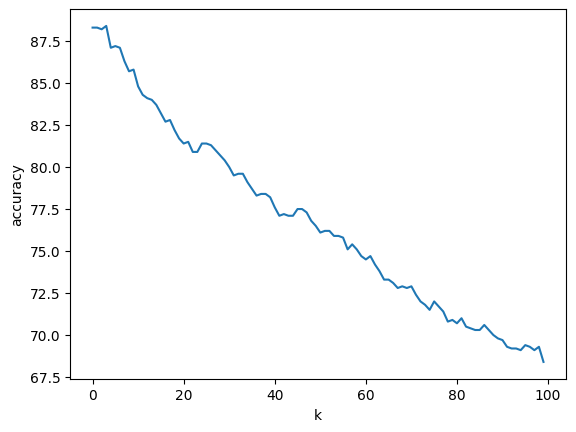

In [ ]:
n = 1000
k = 1
max_k = 100
accuracy_vector = np.empty(max_k)

while k <= max_k:
    train_images_subset = train[:n]
    train_labels_subset = train_labels[:n]
    correct_predictions = 0

    for i in range(len(test)):
        prediction = knn(train_images_subset, train_labels_subset, test[i], k)
        if prediction == test_labels[i]:
            correct_predictions += 1

    accuracy_vector[k-1] = (correct_predictions / len(test)) * 100
    k += 1


plt.plot(accuracy_vector)
plt.xlabel('k')
plt.ylabel('Accuracy [%]')
plt.show()

section d

In [ ]:
k = 1
n_values = range(100, 5100, 100)
accuracy_vector = []

for n in n_values:
    train_images_subset = train[:n]
    train_labels_subset = train_labels[:n]
    correct_predictions = 0

    for i in range(len(test)):
      prediction = knn(train_images_subset, train_labels_subset, test[i], k)
      if prediction == test_labels[i]:
          correct_predictions += 1

    accuracy_vector.append((correct_predictions / len(test)) * 100)

plt.plot(n_values, accuracy_vector)
plt.xlabel('Number of Training Samples (n)')
plt.ylabel('Accuracy [%]')
plt.title('k-NN Accuracy vs. Number of Training Samples (k = 1)')
plt.grid(True)
plt.show()